In [1]:
import sys
import os
# Get parent of current working directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add it to sys.path
sys.path.insert(0, parent_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from StlData import StlData

## StlData class

shape data = (256, 256)
shape data_full = (20, 256, 256)


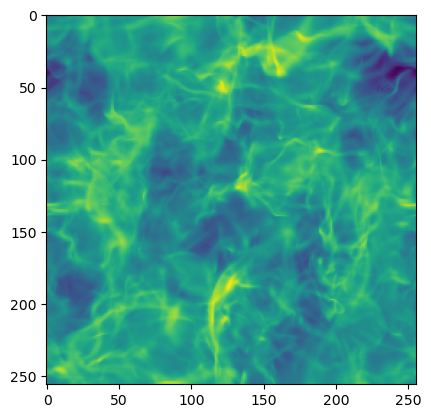

In [4]:
# Load some data
data_full = np.load("Turb_6.npy")
data = data_full[0]
print("shape data = " + str(data.shape))
print("shape data_full = " + str(data_full.shape))
plt.imshow(data)

In [5]:
# Test of the initialization of StlData for MR=False
DT = "DT1"
stl_data = StlData(DT, data)
stl_data_full = StlData(DT, data_full)

In [6]:
# Test of StlData parameters for MR=False
print("For stl_data:")
print("DT = " + str(stl_data.DT))
print("MR = " + str(stl_data.MR))
print("dg = " + str(stl_data.dg))
print("N0 = " + str(stl_data.N0))
print("list_dg = " + str(stl_data.list_dg))
print("Fourier = " + str(stl_data.Fourier))
print("Type array = " + str(type(stl_data.array)))
print("Size array = " + str(stl_data.array.shape))

print("\n")
print("For stl_data_full:")
print("DT = " + str(stl_data_full.DT))
print("MR = " + str(stl_data_full.MR))
print("dg = " + str(stl_data_full.dg))
print("N0 = " + str(stl_data_full.N0))
print("list_dg = " + str(stl_data_full.list_dg))
print("Fourier = " + str(stl_data_full.Fourier))
print("Type array = " + str(type(stl_data_full.array)))
print("Size array = " + str(stl_data_full.array.shape))

For stl_data:
DT = DT1
MR = False
dg = 0
N0 = (256, 256)
list_dg = None
Fourier = False
Type array = <class 'torch.Tensor'>
Size array = torch.Size([256, 256])


For stl_data_full:
DT = DT1
MR = False
dg = 0
N0 = (256, 256)
list_dg = None
Fourier = False
Type array = <class 'torch.Tensor'>
Size array = torch.Size([20, 256, 256])


## Downsampling functions

dg = 0
shape data after downsampling = torch.Size([256, 256])
dg = 1
shape data after downsampling = torch.Size([128, 128])
dg = 2
shape data after downsampling = torch.Size([64, 64])
dg = 3
shape data after downsampling = torch.Size([32, 32])
dg = 4
shape data after downsampling = torch.Size([16, 16])
dg = 5
shape data after downsampling = torch.Size([16, 16])


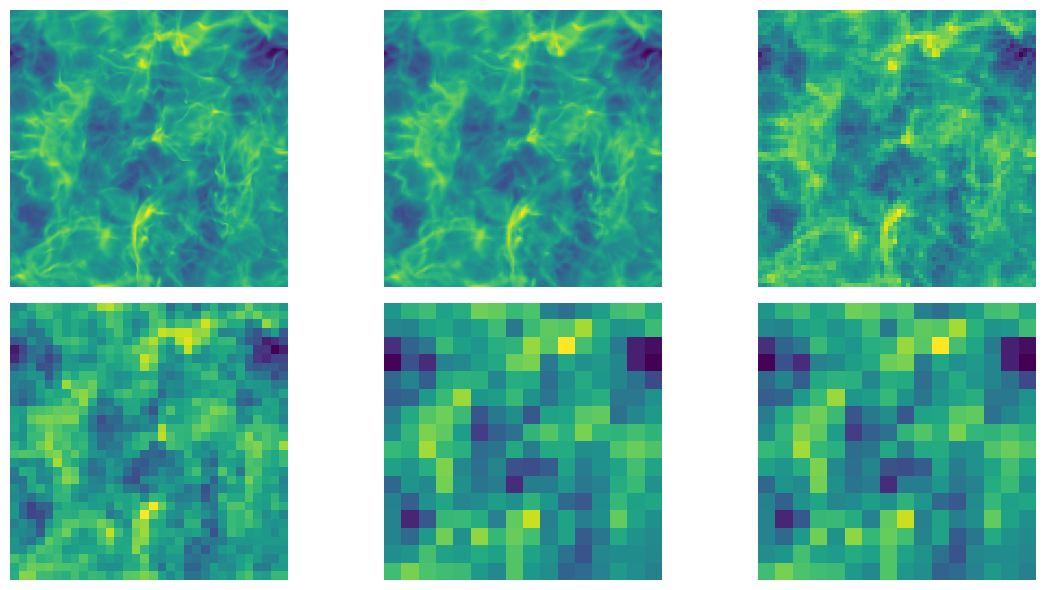

In [8]:
# Test of the downsample function

# Prepare plot
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()

# perform 6 downgrading and plot
for dg, ax in enumerate(axes):
    print("dg = " + str(dg))
    stl_data_dg = stl_data.downsample(dg, copy=True, O_Fourier=False)
    print("shape data after downsampling = " + str(stl_data_dg.array.shape))
    ax.imshow(stl_data_dg.array)
    ax.axis('off') 
plt.tight_layout()
plt.show()

(115, 235)
dg = 0
shape data after downsampling = torch.Size([115, 235])
dg = 1
shape data after downsampling = torch.Size([56, 116])
dg = 2
shape data after downsampling = torch.Size([28, 58])
dg = 3
shape data after downsampling = torch.Size([16, 32])
dg = 4
shape data after downsampling = torch.Size([16, 32])
dg = 5
shape data after downsampling = torch.Size([16, 32])


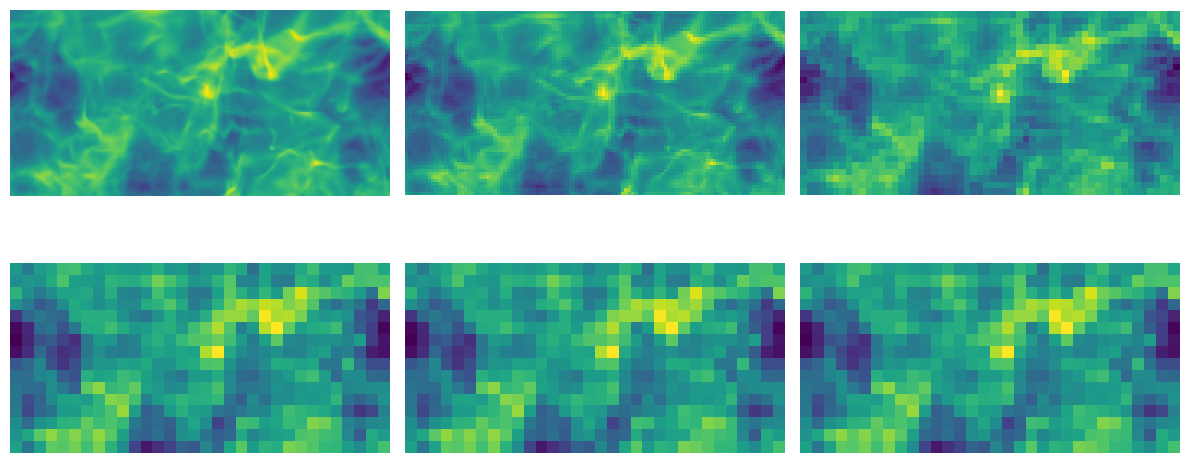

In [9]:
# Test of the downsample function with non-standard size

# Same with modified initial size
stl_data_crop = StlData(DT, data[:115, :235])
print(stl_data_crop.N0)

# Prepare plot
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()
# perform 8 downgrading and plot
for dg, ax in enumerate(axes):
    print("dg = " + str(dg))
    stl_data_crop_dg = stl_data_crop.downsample(dg, copy=True, O_Fourier=False)
    print("shape data after downsampling = " + str(stl_data_crop_dg.array.shape))
    ax.imshow(stl_data_crop_dg.array)
    ax.axis('off') 
plt.tight_layout()
plt.show()

For stl_data_MR:
DT = DT1
MR = True
dg = None
N0 = (256, 256)
list_dg = [0, 1, 2, 3, 4, 5, 6]
Fourier = False
Type array = <class 'list'>
Size array = torch.Size([256, 256])


dg = 0
shape data after downsampling = torch.Size([256, 256])
dg = 1
shape data after downsampling = torch.Size([128, 128])
dg = 2
shape data after downsampling = torch.Size([64, 64])
dg = 3
shape data after downsampling = torch.Size([32, 32])
dg = 4
shape data after downsampling = torch.Size([16, 16])
dg = 5
shape data after downsampling = torch.Size([16, 16])


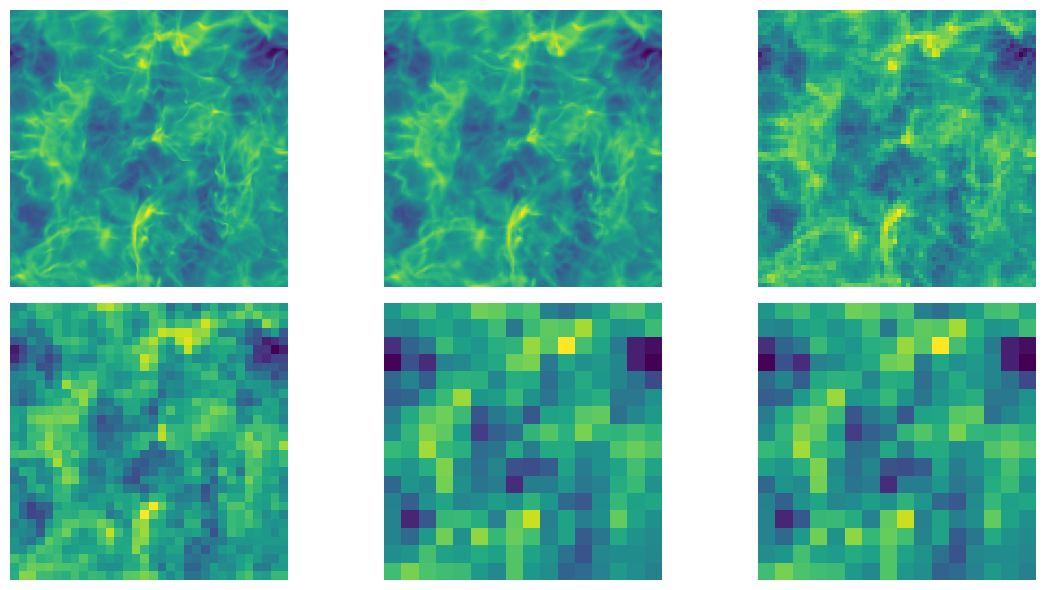

In [10]:
# Test of the downsample_to_MR function
stl_data_MR = stl_data.downsample_toMR(dg_max = 6, O_Fourier=False)

# Test of parameters for a MR=True StlData instance
print("For stl_data_MR:")
print("DT = " + str(stl_data_MR.DT))
print("MR = " + str(stl_data_MR.MR))
print("dg = " + str(stl_data_MR.dg))
print("N0 = " + str(stl_data_MR.N0))
print("list_dg = " + str(stl_data_MR.list_dg))
print("Fourier = " + str(stl_data_MR.Fourier))
print("Type array = " + str(type(stl_data_MR.array)))
print("Size array = " + str(stl_data_MR.array[0].shape))
print("\n")

# Prepare plot
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()
# perform 8 downgrading and plot
for dg, ax in enumerate(axes):
    print("dg = " + str(dg))
    print("shape data after downsampling = " + str(stl_data_MR.array[dg].shape))
    ax.imshow(stl_data_MR.array[dg])
    ax.axis('off') 
plt.tight_layout()
plt.show()

## Slicing

In [12]:
# Test of the slicing a MR=True instance
stl_data_MR_sliced = stl_data_MR[1:3]
print("For stl_data_MR_sliced:")
print("DT = " + str(stl_data_MR_sliced.DT))
print("MR = " + str(stl_data_MR_sliced.MR))
print("dg = " + str(stl_data_MR_sliced.dg))
print("N0 = " + str(stl_data_MR_sliced.N0))
print("list_dg = " + str(stl_data_MR_sliced.list_dg))
print("Fourier = " + str(stl_data_MR_sliced.Fourier))
print("Type array = " + str(type(stl_data_MR_sliced.array)))
print("Size array = " + str(stl_data_MR_sliced.array[0].shape))
print("\n")

# Test of the slicing a MR=True instance giving a MR=False one
stl_data_MR_to_SR = stl_data_MR[1]
print("For stl_data_MR_sliced:")
print("DT = " + str(stl_data_MR_to_SR.DT))
print("MR = " + str(stl_data_MR_to_SR.MR))
print("dg = " + str(stl_data_MR_to_SR.dg))
print("N0 = " + str(stl_data_MR_to_SR.N0))
print("list_dg = " + str(stl_data_MR_to_SR.list_dg))
print("Fourier = " + str(stl_data_MR_to_SR.Fourier))
print("Type array = " + str(type(stl_data_MR_to_SR.array)))
print("Size array = " + str(stl_data_MR_to_SR.array.shape))

For stl_data_MR_sliced:
DT = DT1
MR = True
dg = None
N0 = (256, 256)
list_dg = [1, 2]
Fourier = False
Type array = <class 'list'>
Size array = torch.Size([128, 128])


For stl_data_MR_sliced:
DT = DT1
MR = False
dg = 1
N0 = (256, 256)
list_dg = None
Fourier = False
Type array = <class 'torch.Tensor'>
Size array = torch.Size([128, 128])


## Mean and Cov

In [14]:
# Test of mean with MR=False
mean = stl_data.mean_func()
print(mean)

# Test of mean with MR=True
mean = stl_data_MR.mean_func()
print(mean)

tensor(20.3195, dtype=torch.float64)
tensor([20.3195, 20.3195, 20.3195, 20.3195, 20.3195, 20.3195, 20.3195])


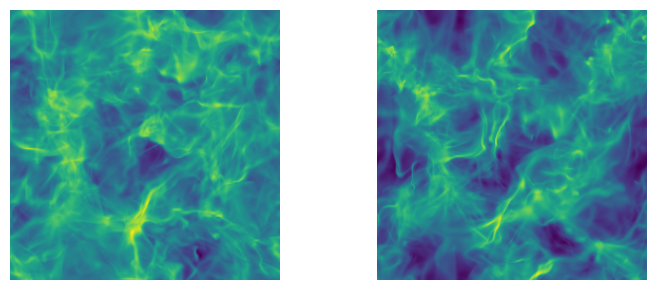

Data1 Fourier status is : False
Data2 Fourier status is : False
Covariance in real space = tensor(0.0175, dtype=torch.float64)
Data1 Fourier status is : True
Data2 Fourier status is : True
Covariance in Fourier space = tensor(0.0175, dtype=torch.float64)
Data1 Fourier status is : False
Data2 Fourier status is : True
Covariance in dual space = tensor(0.0175, dtype=torch.float64)


In [15]:
# Prepare StlData objects for covariance test
data1 = data_full[1]
data2 = data_full[2]
data1 = data1 - data1.mean()
data2 = data2 - data2.mean()
stl_data1 = StlData(DT, data1)
stl_data2 = StlData(DT, data2)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes = axes.ravel()
axes[0].imshow(stl_data1.array)
axes[0].axis('off')
axes[1].imshow(stl_data2.array)
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Test of Cov in real space
print("Data1 Fourier status is : " + str(stl_data1.Fourier))
print("Data2 Fourier status is : " + str(stl_data2.Fourier))
cov = StlData.cov_func(stl_data1, stl_data2)
print("Covariance in real space = " + str(cov))

# Test of Cov in real space
stl_data1.fourier_func()
stl_data2.fourier_func()
print("Data1 Fourier status is : " + str(stl_data1.Fourier))
print("Data2 Fourier status is : " + str(stl_data2.Fourier))
cov = StlData.cov_func(stl_data1, stl_data2)
print("Covariance in Fourier space = " + str(cov))

# Test of Cov in dual spaces
stl_data1.ifourier_func()
print("Data1 Fourier status is : " + str(stl_data1.Fourier))
print("Data2 Fourier status is : " + str(stl_data2.Fourier))
cov = StlData.cov_func(stl_data1, stl_data2)
print("Covariance in dual space = " + str(cov))

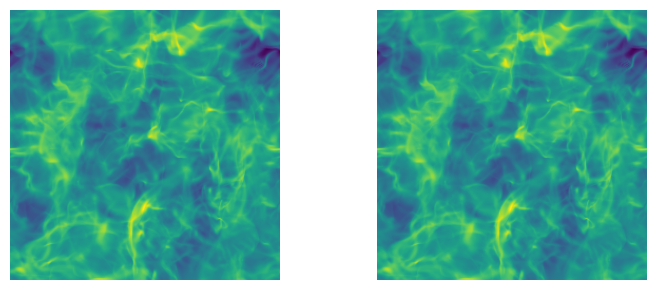

Data1 Fourier status is : False
Data2 Fourier status is : False
Covariance in real space = tensor(0.0641, dtype=torch.float64)
Auto-Covariance in real space = tensor(0.0641, dtype=torch.float64)
Data1 Fourier status is : True
Data2 Fourier status is : True
Covariance in Fourier space = tensor(0.0641, dtype=torch.float64)
Auto-Covariance in Fourier space = tensor(0.0641, dtype=torch.float64)
Data1 Fourier status is : False
Data2 Fourier status is : True
Covariance in dual space = tensor(0.0641, dtype=torch.float64)


In [16]:
# Auto-Covariance test
data1 = data_full[0]
data2 = data_full[0]
data1 = data1 - data1.mean()
data2 = data2 - data2.mean()
stl_data1 = StlData(DT, data1)
stl_data2 = StlData(DT, data2)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes = axes.ravel()
axes[0].imshow(stl_data1.array)
axes[0].axis('off')
axes[1].imshow(stl_data2.array)
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Test of Cov in real space
print("Data1 Fourier status is : " + str(stl_data1.Fourier))
print("Data2 Fourier status is : " + str(stl_data2.Fourier))
cov = StlData.cov_func(stl_data1, stl_data2)
print("Covariance in real space = " + str(cov))
cov = StlData.cov_func(stl_data1)
print("Auto-Covariance in real space = " + str(cov))

# Test of Cov in real space
stl_data1.fourier_func()
stl_data2.fourier_func()
print("Data1 Fourier status is : " + str(stl_data1.Fourier))
print("Data2 Fourier status is : " + str(stl_data2.Fourier))
cov = StlData.cov_func(stl_data1, stl_data2)
print("Covariance in Fourier space = " + str(cov))
cov = StlData.cov_func(stl_data1)
print("Auto-Covariance in Fourier space = " + str(cov))

# Test of Cov in dual spaces
stl_data1.ifourier_func()
print("Data1 Fourier status is : " + str(stl_data1.Fourier))
print("Data2 Fourier status is : " + str(stl_data2.Fourier))
cov = StlData.cov_func(stl_data1, stl_data2)
print("Covariance in dual space = " + str(cov))